In [1]:
# DEFINING REQUIRED PACKAGES ---------------------------------------
import matplotlib.pyplot as plt #import matplotlib to create plots
import scipy.optimize as opt; #allows for curve fitting
from scipy.odr import *
import pandas as pd #importing pandas to use dataframes
import numpy as np
from scipy.constants import g, pi
plt.style.reload_library()
plt.style.use(['science', 'grid'])
from scipy.odr import ODR, Model, Data, RealData
from scipy.optimize import curve_fit
import ipywidgets as widgets

In [64]:
# FITTING FUNCTIONS
def proportionality(x,a):
    return a*x

def LinearPlot(xdata,ydata,a,b,function,color,x_label,y_label):
    fig = plt.figure(figsize=(5, 5), dpi=80)
    if b==0:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X}$'
    else:
        label = r'$\textit{Y = ' + str("{:.2e}".format(a)) + 'X + ' + str("{:.2e}".format(b)) + '}$'
    plt.plot(xdata,function(xdata,*parameters),label = label, color=color)
    plt.scatter(xdata,ydata, color='black', s=25)
    plt.legend(loc = 'upper left')
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    plt.legend(prop={'size': 15}, loc=2)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.savefig("Figures/figure.png")

In [86]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1zPgnGxZNv4PcrLFZRiweueYVgk9N8oiKyZkiprx4ots'
workSheetName = 'PreLab'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(
    googleSheetId, workSheetName)
df = pd.read_csv(URL)
df = df.iloc[: , :5]
df

,$$R/Ro$$,$Ln(R/R_0)$,$$T (K)$$,$$T/T_0$$,$Ln(T/T_0)$
0,1.00,0.000,300,1.000,0.000
1,1.43,0.358,400,1.333,0.288
2,1.87,0.626,500,1.667,0.511
3,2.34,0.850,600,2.000,0.693
4,2.85,1.047,700,2.333,0.847
5,3.36,1.212,800,2.667,0.981
6,3.88,1.356,900,3.000,1.099
7,4.41,1.484,1000,3.333,1.204
8,4.95,1.599,1100,3.667,1.299
9,5.48,1.701,1200,4.000,1.386


In [10]:
# DISPLAYING DROPDOWN MENU OF COLUMNS ---------------------------------------
filenames = list(df.columns.values)
filenames.insert(0, 'Select Column')
drop_down_x = widgets.Dropdown(options=filenames,
                                description='X-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
drop_down_y = widgets.Dropdown(options=filenames,
                                description='Y-axis',
                                disabled=False,
                                layout={'width': 'max-content'})
display(drop_down_y, drop_down_x)

Dropdown(description='Y-axis', layout=Layout(width='max-content'), options=('Select Column', '$$R/Ro$$', '$Ln(…

Dropdown(description='X-axis', layout=Layout(width='max-content'), options=('Select Column', '$$R/Ro$$', '$Ln(…

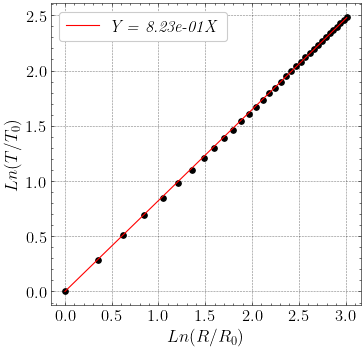

In [87]:
# FITTING THE DATA USING A LINEAR RELATIONSHIP ---------------------------------------
xdata, ydata = df[drop_down_x.value], df[drop_down_y.value]
parameters, covariance = opt.curve_fit(proportionality, xdata, ydata)
perr = np.sqrt(np.diag(covariance))

#Calculate the error on the fits from the covariacne matrix
slope = parameters[0]
slope_error = perr[0]

if parameters.shape[0] > 1: 
    b = parameters[1] 
    b_error = perr[1]
else:
    b = 0
    b_error = 0

# PLOTTING THE DATA ---------------------------------------
LinearPlot(xdata,ydata,slope,b,proportionality,'red',drop_down_x.value,drop_down_y.value)

In [88]:
slope, slope_error

(0.8227572111230458, 0.0006755553493553604)

In [81]:
# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD (Each function must receive a parameters array)
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

def calc_resistance(parameters): #[V,I]
    return parameters[0]/parameters[1]

def calc_temperature(parameters): #[T_0, R, R_0, c]
    return parameters[0]*(parameters[1]/parameters[2])**parameters[3]

In [92]:
# CALCULATING THE RESISTANCE OF THE BULB AT LAB CONDITIONS
V, V_error, I, I_error = 59.3, 0.01, 1.12, 0.01
R, R_error = calc_resistance([V,I]), uncertainty_var([V,I], [V_error,I_error], calc_resistance)
print('R = (', R, ' ± ', R_error, ") Ohm")

R = ( 52.94642857142856  ±  0.47285796140846265 ) Ohm


In [93]:
# CALCULATING THE TEMPERATURE OF THE BULB
T0, T0_error, R0, R0_error = 295.7, 0, 4.65, 0.01
T, T_error = calc_temperature([T0, R, R0, slope]), uncertainty_var([T0, R, R0, slope], [T0_error, R_error, R0_error, slope_error], calc_resistance)
print('T = (', T, ' ± ', T_error, ") K")

T = ( 2187.7548034898173  ±  0.04988193931029583 ) K
